In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
from scipy.stats import norm
import statsmodels.api as sm

In [89]:
UMD = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/UMD.csv")
UMD.DATE = pd.to_datetime(UMD.DATE)
UMD.dropna(subset = ["DATE"],inplace=True)
UMD.set_index("DATE",inplace=True)
UMD_USA = UMD[['USA']]

In [90]:
SMB = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/SMB.csv")
SMB.DATE = pd.to_datetime(SMB.DATE)
SMB.dropna(subset = ["DATE"],inplace=True)
SMB.set_index("DATE",inplace=True)
SMB_USA = SMB[['USA']]

In [91]:
HML = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/HML Devil.csv")
HML.DATE = pd.to_datetime(HML.DATE)
HML.dropna(subset = ["DATE"],inplace=True)
HML.set_index("DATE",inplace=True)
HML_USA = HML[['USA']]

In [92]:
MKT = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/MKT.csv")
MKT.DATE = pd.to_datetime(MKT.DATE)
MKT.dropna(subset = ["DATE"],inplace=True)
MKT.set_index("DATE",inplace=True)
MKT_USA = MKT[['USA']]

In [93]:
UMDc = np.log(1+UMD_USA)
UMDi = np.cumsum(UMDc)
SMBc = np.log(1+SMB_USA)
SMBi = np.cumsum(SMBc)
HMLc = np.log(1+HML_USA)
HMLi = np.cumsum(HMLc)
MKTc = np.log(1+MKT_USA)
MKTi = np.cumsum(MKTc)

# Descriptive Statistics of Factor Returns

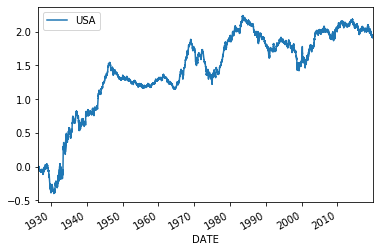

In [94]:
SMBi.plot()

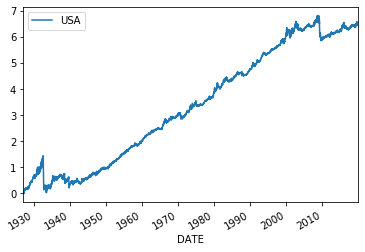

In [95]:
UMDi.plot()

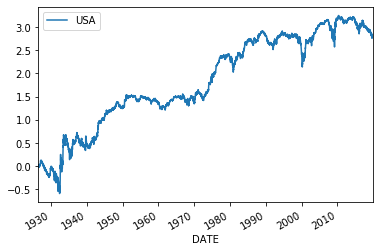

In [96]:
HMLi.plot()

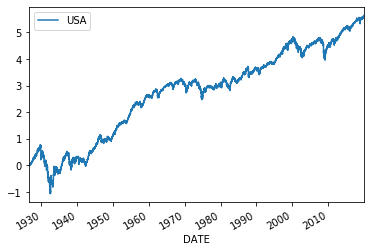

In [97]:
MKTi.plot()

In [98]:
Index = SMBi.copy()
Index['HML'] = HMLi.values
Index['MKT'] = MKTi.values
Index['UMD'] = 0
Index['UMD'][Index.shape[0]-UMDi.shape[0]:Index.shape[0]] = UMDi.iloc[:,0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [99]:
Index.columns = ['SMB','HML','MKT','UMD']
IndexR = Index.diff()
IndexR.dropna(inplace=True)
IndexR_M = IndexR.resample("M").sum()
IndexRY = IndexR.resample("Y").sum()

Text(0.5, 1.0, 'MKT Distribution')

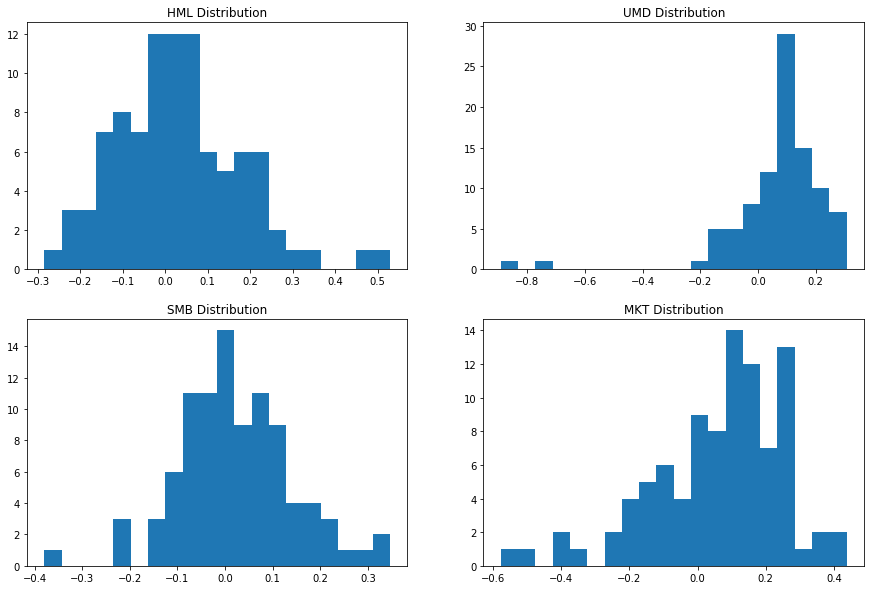

In [100]:
fig, axs = plt.subplots(2, 2,figsize = (15,10))
axs[0,0].hist(IndexRY.HML,20)
axs[0,0].set_title("HML Distribution")
axs[0,1].hist(IndexRY.UMD,20)
axs[0,1].set_title("UMD Distribution")
axs[1,0].hist(IndexRY.SMB,20)
axs[1,0].set_title("SMB Distribution")
axs[1,1].hist(IndexRY.MKT,20)
axs[1,1].set_title("MKT Distribution")

# Macro Indicators

In [101]:
Quat = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/QuarterlyData.csv")
Quat.Date = pd.to_datetime(Quat.Date)
Quat.set_index("Date",inplace=True)

In [102]:
Mon = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/MonthlyData.csv")
Mon.Date = pd.to_datetime(Mon.Date)
Mon.set_index("Date",inplace=True)

In [103]:
Day = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/DailyData.csv")
Day.Date = pd.to_datetime(Day.Date)
Day.set_index("Date",inplace=True)

In [104]:
GDP = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/US GDP.csv")
GDP.DATE = pd.to_datetime(GDP.DATE)
GDP.set_index("DATE",inplace=True)

In [105]:
Val2 = pd.merge(Quat,IndexR_M,left_on=Quat.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)
Val2.set_index("DATE",inplace=True)
Val2.ffill(axis=0,inplace=True)
Val2 = pd.merge(Mon,Val2,left_on=Mon.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)
DayM = Day.resample("M").mean()
Val2 = pd.merge(DayM,Val2,left_on=DayM.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)
Val2.set_index("DATE",inplace=True)
Val2.describe()

,Policy Rates,One Year YC,Trend restored,Real GDP,Corporate Spread,3MTed,ConsumerSentiment,VIX,PMI,CPI,GDP,SMB,HML,MKT,UMD
count,239.000000,173.000000,239.000000,239.000000,208.000000,421.000000,421.000000,349.000000,421.00000,421.000000,874.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,1.771202,0.064536,90.875746,2.244770,1.920288,4.005137,87.833017,19.941948,52.29715,2.776722,3.254348,0.001728,0.002512,0.005016,0.005757
std,1.906099,0.254503,9.873866,6.548183,0.851103,2.926275,12.461813,8.489720,4.58893,1.433072,3.806426,0.029224,0.040027,0.052651,0.049345
min,0.125000,-0.508839,74.188000,-18.300000,1.180000,0.230600,56.400000,11.180000,34.50000,-1.400000,-10.000000,-0.141617,-0.197164,-0.331690,-0.655031
25%,0.125000,-0.123794,84.537750,-1.700000,1.420000,1.160000,80.400000,13.290000,50.10000,1.700000,1.200000,-0.014322,-0.016822,-0.020631,-0.009093
50%,1.125000,0.070603,89.797900,2.200000,1.685000,4.052500,91.200000,18.020000,52.40000,2.900000,3.200000,-0.000012,-0.000382,0.009754,0.008852
75%,2.375000,0.269481,98.923250,6.200000,2.140000,6.083750,95.100000,23.950000,55.50000,3.900000,5.000000,0.016423,0.016714,0.035594,0.027803
max,6.500000,0.574783,109.905600,22.900000,5.750000,10.312500,107.300000,44.140000,61.00000,6.100000,16.700000,0.309461,0.407740,0.317264,0.158093


# Signal Generation

In [125]:
def signalCorr(S,R,title="",n=12):
    ind = ~np.isnan(S)*(~np.isnan(R))
    S = S[ind]
    R = R[ind]
    S = (S-np.mean(S))/np.std(S)
    R = (R-np.mean(R))/np.std(R)
    rw = S.shape[0]
    ans = np.zeros(n-1)
    for i in range(1,n):
        S = S[0:rw-i]
        cumR = np.zeros([S.shape[0]])
        for j in range(len(cumR)):
            cumR[j] = sum(R[j+1:j+i+1])
        ans[i-1] = np.corrcoef(S,cumR)[0,1]
    return ans

In [107]:
def score(lookback,index):
    score = np.repeat(np.nan,index.shape[0])
    
    for i in range(len(index)-lookback+1):
        data = index[i:i+lookback]
        #print(data)
        data = (data - np.mean(data))/np.std(data)
        score[i+lookback-1] = norm.cdf(data[-1])
    return score

In [136]:
def plot4charts(indicator,title):
    
    plt.show()
    plt.tight_layout()
    fig, axes = plt.subplots(figsize=(20,10), nrows=2, ncols=2)
    ans = signalCorr(indicator,Val2['SMB'].values,"SMB")
    axes[0,0].bar(np.arange(1,12),ans)
    if ans[0]>0:
        axes[0,0].axhline(y=2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
        axes[0,0].set_title(title+" Leading Relationship with SMB")
    else:
        axes[0,0].axhline(y=-2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
    
    ans = signalCorr(indicator,Val2['HML'].values,"HML")    
    axes[0,1].bar(np.arange(1,12),ans)
    if ans[0]>0:
        axes[0,1].axhline(y=2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
        axes[0,1].set_title(title+" Leading Relationship with HML")
    else:
        axes[0,1].axhline(y=-2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
    
    ans = signalCorr(indicator,Val2['UMD'].values,"UMD")
    axes[1,0].bar(np.arange(1,12),ans)    
    if ans[0]>0:
        axes[1,0].axhline(y=2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
        axes[1,0].set_title(title+" Leading Relationship with UMD")
    else:
        axes[1,0].axhline(y=-2/np.sqrt(Val2.shape[0]), color='r', linestyle='-') 
    
    ans = signalCorr(indicator,Val2['MKT'].values,"MKT")
    axes[1,1].bar(np.arange(1,12),ans)
    if ans[0]>0:
        axes[1,1].axhline(y=2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')
        axes[1,1].set_title(title+" Leading Relationship with MKT")
    else:
        axes[1,1].axhline(y=-2/np.sqrt(Val2.shape[0]), color='r', linestyle='-')         


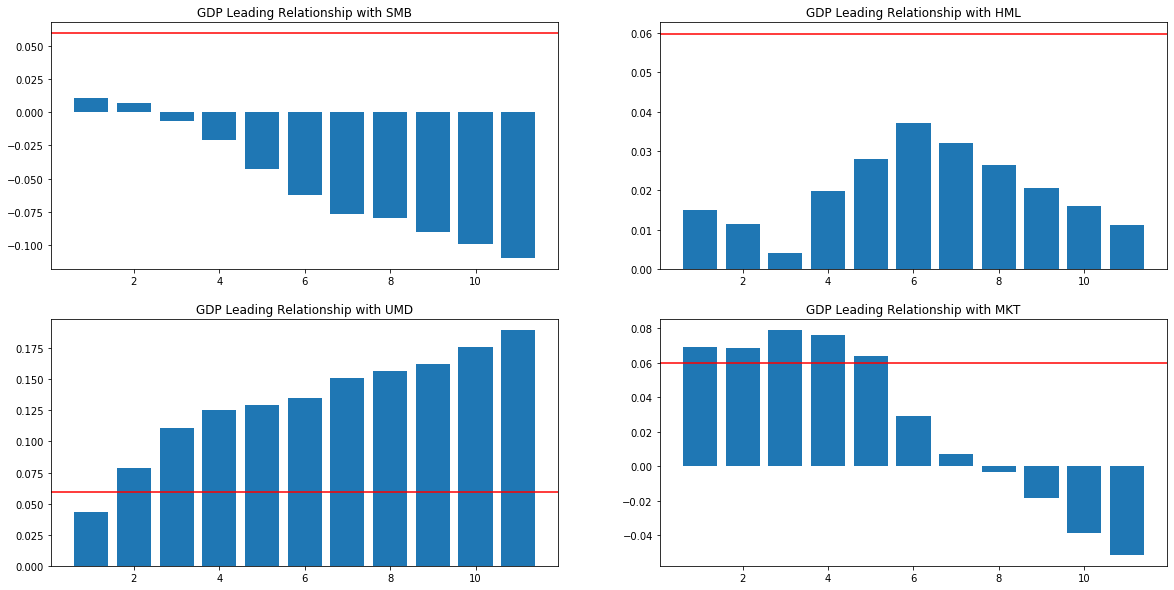

In [133]:
plot4charts(Val2['GDP'].values,"GDP")

<Figure size 432x288 with 0 Axes>

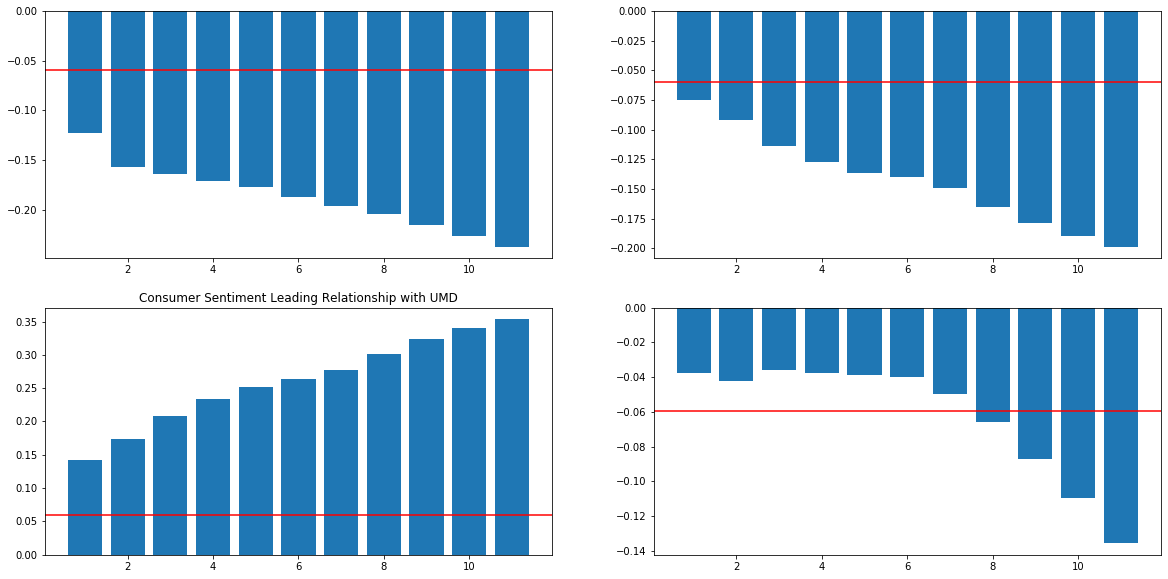

In [137]:
plot4charts(Val2['ConsumerSentiment'].values,"Consumer Sentiment")

<Figure size 432x288 with 0 Axes>

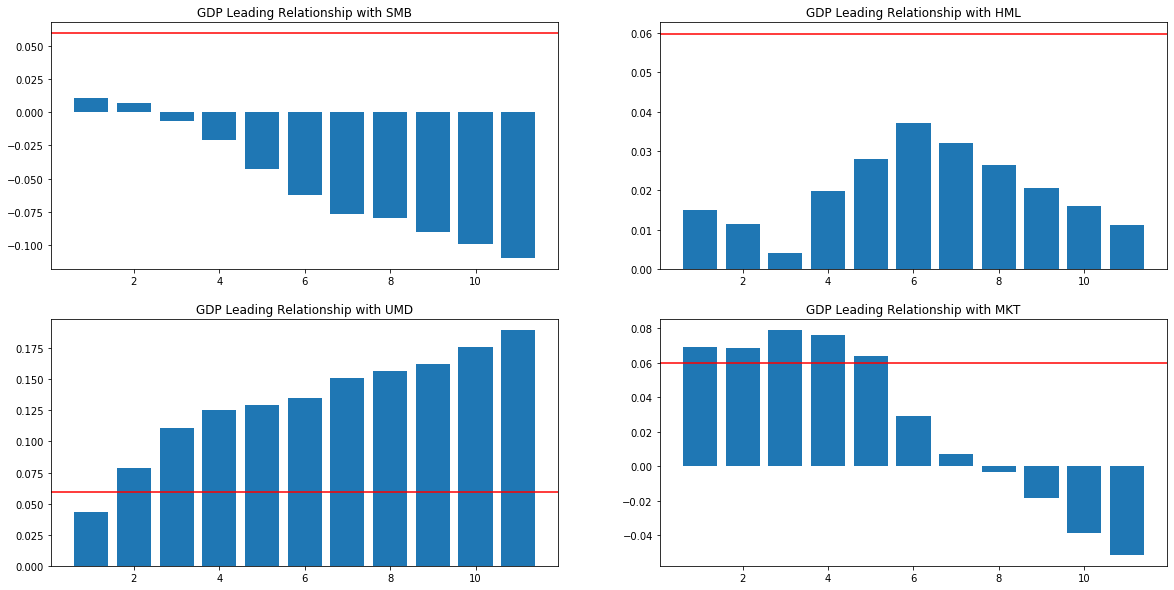

In [139]:
plot4charts(Val2['GDP'].values,"GDP")

# Backtesting

In [111]:
def myOLS(Y,X):
    data = np.c_[Y,X]
    ind = np.all(~np.isnan(data),axis=1)
    #print(ind)
    X = X[ind]
    Y = Y[ind]
    #print(X)
    X = sm.add_constant(X)
    res = sm.OLS(Y, X).fit(cov='HC3')
    #print(res.summary())
    return res